In [2]:
import pickle
import pandas as pd
df = pd.read_csv('posneg2.csv')
df = df.dropna()
df.reset_index(drop=True, inplace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19149 entries, 0 to 19148
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  19149 non-null  object
 1   date    19149 non-null  object
 2   label   19149 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 448.9+ KB


In [4]:
df

,review,date,label
0,rat tot,"May 04, 2024",1
1,tốt,"May 04, 2024",1
2,concac,"May 04, 2024",1
3,momo làm_ăn rất tệ bộ_phận chăm_sóc hỗ_trợ khá...,"May 04, 2024",0
4,bảo_trì thì đặt lịch vào buổi khuya lúc ít ngư...,"May 04, 2024",1
...,...,...,...
19144,tốt,"April 10, 2023",1
19145,đăng_nhập không được,"April 10, 2023",0
19146,mọi người thấy sao tui dùng thì rất ok lag là ...,"April 10, 2023",1
19147,cái app đáng nguyền_rủa mỗi lần uphạn sử_dụng ...,"April 10, 2023",0


In [5]:
df.label.value_counts()
     

label
1    9637
0    9512
Name: count, dtype: int64

# Distribution of Review Scores

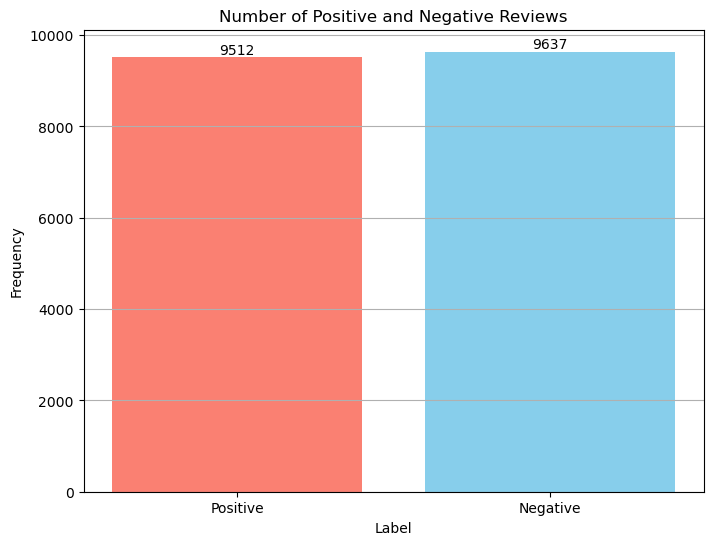

In [5]:
import matplotlib.pyplot as plt

# Count the frequency of each label
label_counts = df['label'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(label_counts.index, label_counts.values, color=['skyblue', 'salmon'])

# Add text labels for each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')

plt.title('Number of Positive and Negative Reviews')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(label_counts.index, ['Negative', 'Positive'])
plt.grid(axis='y')
plt.show()


# Monthly Count of Negative and Positive Reviews

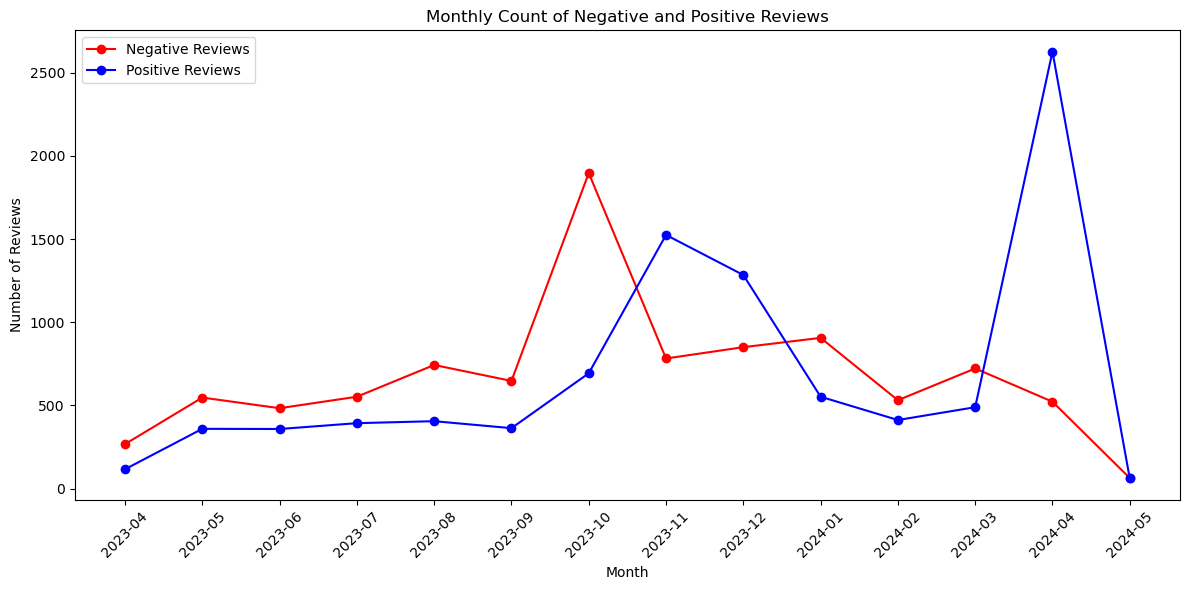

In [40]:
import pandas as pd
import matplotlib.pyplot as plt


# Aggregate data to get the count of positive and negative reviews per month
monthly_review_counts = df.groupby(['Month', 'label']).size().unstack(fill_value=0)

# Rename columns for better readability
monthly_review_counts.columns = ['Negative Reviews', 'Positive Reviews']

# Plot the data using a line chart
plt.figure(figsize=(12, 6))
plt.plot(monthly_review_counts.index.astype(str), monthly_review_counts['Negative Reviews'], marker='o', label='Negative Reviews', color='red')
plt.plot(monthly_review_counts.index.astype(str), monthly_review_counts['Positive Reviews'], marker='o', label='Positive Reviews', color='blue')

# Customize the plot
plt.title('Monthly Count of Negative and Positive Reviews')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.legend()
plt.grid(False)

# Show the plot
plt.tight_layout()
plt.show()


# Tokens

In [6]:
data3_list = df['review'].tolist()
count_words = [len(i.split()) for i in data3_list]
df['count_words'] = count_words

## Statistics 

In [7]:
df.count_words.describe()

count    19149.000000
mean         8.654133
std         11.760679
min          1.000000
25%          1.000000
50%          4.000000
75%         11.000000
max        121.000000
Name: count_words, dtype: float64

## Distribution of tokens in total reviews

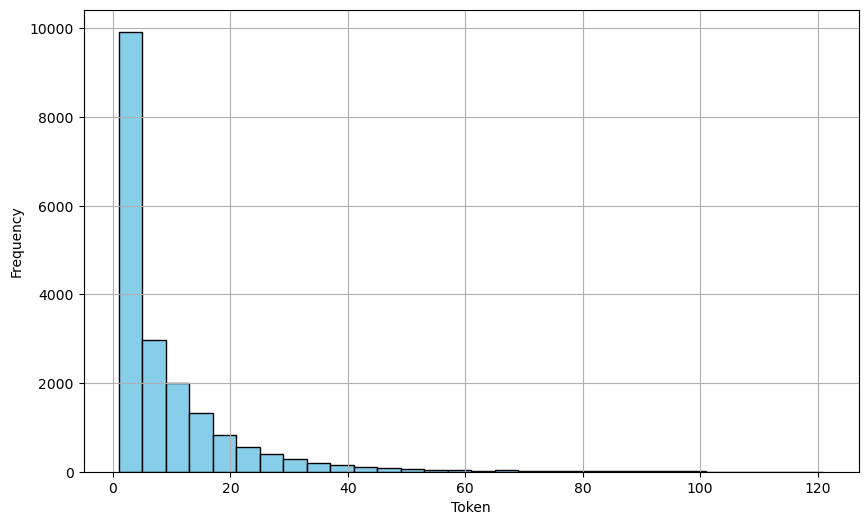

In [34]:
import matplotlib.pyplot as plt

# Plotting the distribution of word_count column
plt.figure(figsize=(10, 6))
plt.hist(df['Word_Count'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Token')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# Word Cloud

In [6]:
def gen_freq(text):
    #will store all the words in list
    words_list = []
    
    #Loop over all the words and extract word from list
    for word in text.split():
        words_list.extend(word)
        
    #Generate word frequencies using value counts in word_list
    word_freq = pd.Series(words_list).value_counts()
    
    #print top 100 words
    word_freq[:100]
    
    return word_freq    

In [7]:
!pip install -q plotly-express
!pip install wordcloud
!pip install nltk

import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction import text 
from nltk.corpus import stopwords
import string
import seaborn as sns
from collections import Counter
from datetime import datetime, timedelta

DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with 

## Positive Reviews

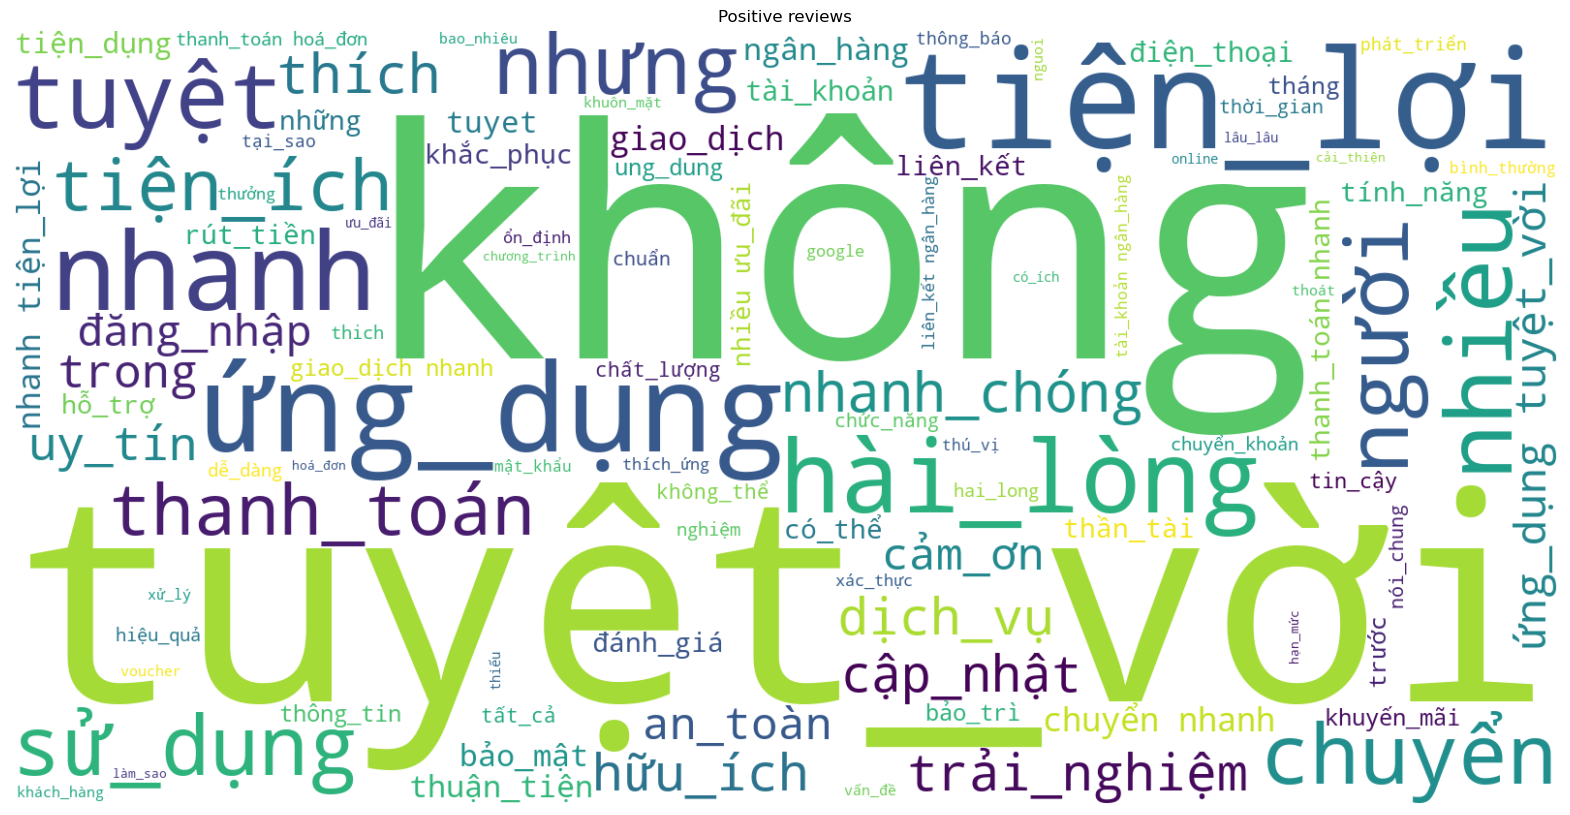

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Add "positive" to the list of stopwords
stopwords = set(STOPWORDS)
stopwords.update(["negative", "positive"])

# Generate the word cloud with the specified parameters
plt.figure(figsize=(20, 20))
Wc = WordCloud(
    max_words=100,
    width=1600,
    height=800,
    min_word_length=5,
    stopwords=stopwords,
    background_color='white'
).generate(" ".join(df[df.label == 1].review))

# Plot the word cloud
plt.axis("off")
plt.title('Positive reviews')
plt.imshow(Wc, interpolation='bilinear')
plt.show()

## Negative Reviews

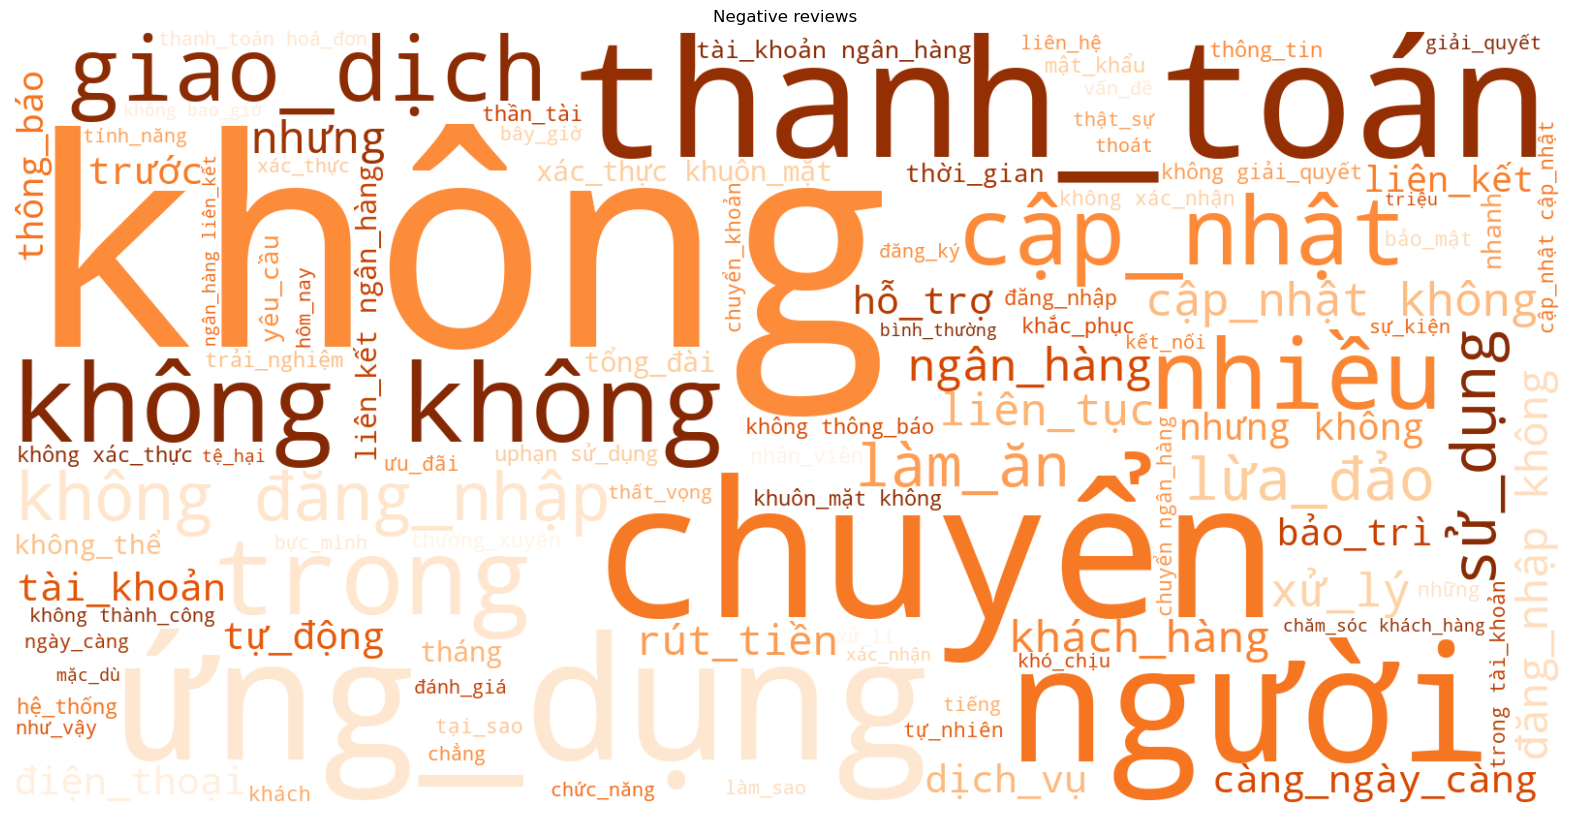

In [22]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Add "negative" and "positive" to the list of stopwords
stopwords = set(STOPWORDS)
stopwords.update(["negative", "positive"])

# Generate the word cloud with the specified parameters
plt.figure(figsize=(20, 20))
Wc = WordCloud(
    max_words=100,
    width=1600,
    height=800,
    colormap="Oranges",
    min_word_length=5,
    stopwords=stopwords,
    background_color='white'
).generate(" ".join(df[df.label == 0].review))

# Plot the word cloud
plt.axis("off")
plt.title('Negative reviews')
plt.imshow(Wc, interpolation='bilinear')
plt.show()


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Function to create a heatmap of top 30 words in negative or positive review in the past 24 months
def plot_top_30_words_heatmap(df, is_positive=True):
    
    # Function to count word frequency in each review_content
    def count_word_frequency(text):
        words = text.split()  # Split text into words
        words = [word for word in words if word.lower() not in {"positive", "negative"}]  # Remove "positive" and "negative"
        word_frequency = Counter(words)  # Count occurrences of each word
        return word_frequency  # Return the frequency of each word

    # Extract month from 'time'
    df['Month'] = pd.to_datetime(df['date']).dt.to_period('M')

    # Apply word frequency count to each review_content
    df['Word_Frequency'] = df['review'].apply(count_word_frequency)

    # Filter out either positive or negative reviews
    filtered_reviews = df[df['label'] == (1 if is_positive else 0)]

    # Create a DataFrame for word frequency in filtered reviews by month
    word_frequency_filtered = pd.DataFrame(filtered_reviews.groupby('Month')['Word_Frequency'].sum())

    # Combine word frequencies across all months
    all_words_frequency = Counter()
    for word_freq in word_frequency_filtered['Word_Frequency']:
        all_words_frequency += word_freq

    # Select the top 30 most common words in filtered reviews
    top_30_words = dict(all_words_frequency.most_common(30))

    # Create a DataFrame for the top 30 words' frequency in filtered reviews by month
    top_30_frequency = pd.DataFrame(word_frequency_filtered['Word_Frequency'].apply(
        lambda x: {k: v for k, v in x.items() if k in top_30_words}).fillna(0))

    # Create a pivot table to prepare data for the heatmap and set 'Month' as the index
    pivot_table_top_30 = top_30_frequency['Word_Frequency'].apply(pd.Series).fillna(0)

    # Transpose the pivot table for the heatmap (Month as X-axis, Words as Y-axis)
    pivot_table_top_30 = pivot_table_top_30.T

    # Plotting the heatmap for top 30 words in filtered reviews in the past 24 months with 'Month' as X-axis
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_table_top_30, cmap='YlGnBu', annot=True, fmt='g', linewidths=0.5)
    
    # Set title based on the review sentiment
    review_sentiment = "Positive" if is_positive else "Negative"
    plt.title(f'Top 30 Words in {review_sentiment} Reviews - Time-based Cohort by Month')
    plt.xlabel('Month')
    plt.ylabel('Words')
    
    plt.show()

In [29]:
df['Word_Count'] = df['review'].apply(lambda x: len(str(x).split()))
df

,review,date,label,count_words,Word_Count,Month,Word_Frequency
0,rat tot,"May 04, 2024",1,2,2,2024-05,"{'rat': 1, 'tot': 1}"
1,tốt,"May 04, 2024",1,1,1,2024-05,{'tốt': 1}
2,concac,"May 04, 2024",1,1,1,2024-05,{'concac': 1}
3,momo làm_ăn rất tệ bộ_phận chăm_sóc hỗ_trợ khá...,"May 04, 2024",0,53,53,2024-05,"{'momo': 1, 'làm_ăn': 1, 'rất': 1, 'tệ': 2, 'b..."
4,bảo_trì thì đặt lịch vào buổi khuya lúc ít ngư...,"May 04, 2024",1,22,22,2024-05,"{'bảo_trì': 2, 'thì': 1, 'đặt': 1, 'lịch': 1, ..."
...,...,...,...,...,...,...,...
19144,tốt,"April 10, 2023",1,1,1,2023-04,{'tốt': 1}
19145,đăng_nhập không được,"April 10, 2023",0,3,3,2023-04,"{'đăng_nhập': 1, 'không': 1, 'được': 1}"
19146,mọi người thấy sao tui dùng thì rất ok lag là ...,"April 10, 2023",1,30,30,2023-04,"{'mọi': 1, 'người': 1, 'thấy': 1, 'sao': 1, 't..."
19147,cái app đáng nguyền_rủa mỗi lần uphạn sử_dụng ...,"April 10, 2023",0,14,14,2023-04,"{'cái': 1, 'app': 1, 'đáng': 1, 'nguyền_rủa': ..."


## Top 30 Popular Words

## Positive Reviews

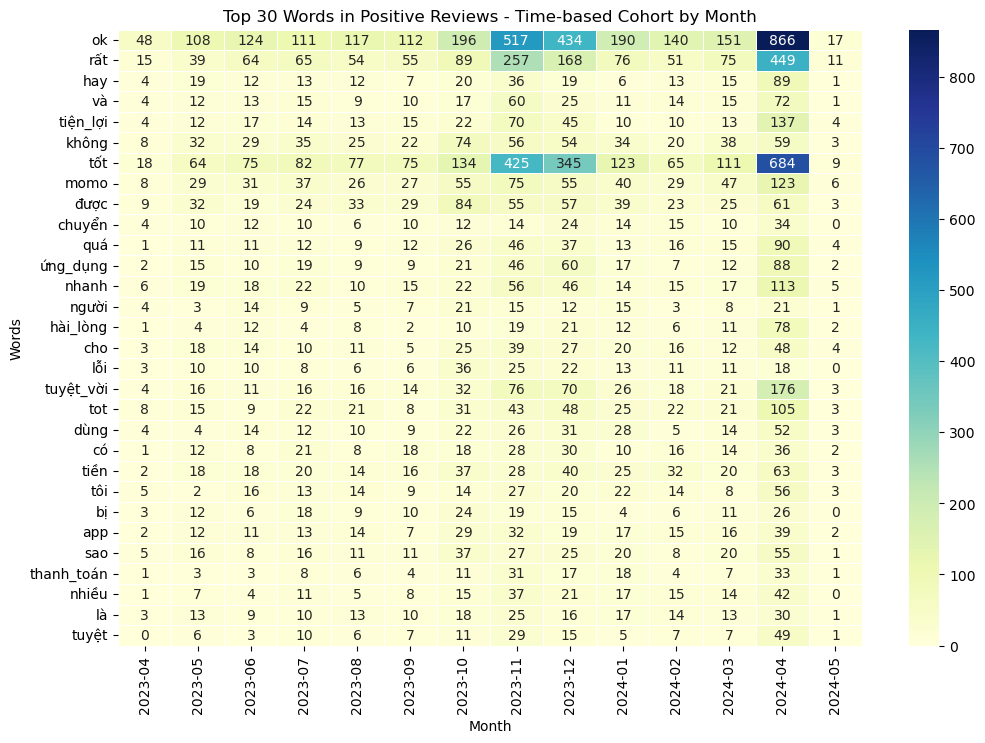

In [36]:
plot_top_30_words_heatmap(df, is_positive=True)

## Negative Reviews

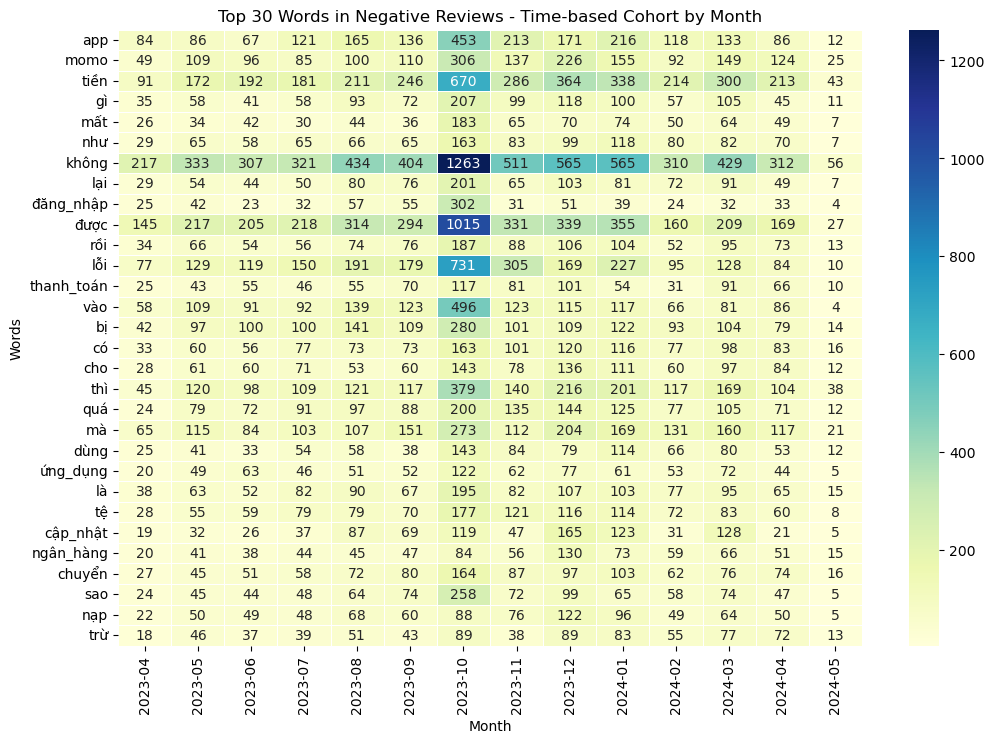

In [37]:
plot_top_30_words_heatmap(df, is_positive=False)

In [41]:
df

,review,date,label,count_words,Word_Count,Month,Word_Frequency
0,rat tot,"May 04, 2024",1,2,2,2024-05,"{'rat': 1, 'tot': 1}"
1,tốt,"May 04, 2024",1,1,1,2024-05,{'tốt': 1}
2,concac,"May 04, 2024",1,1,1,2024-05,{'concac': 1}
3,momo làm_ăn rất tệ bộ_phận chăm_sóc hỗ_trợ khá...,"May 04, 2024",0,53,53,2024-05,"{'momo': 1, 'làm_ăn': 1, 'rất': 1, 'tệ': 2, 'b..."
4,bảo_trì thì đặt lịch vào buổi khuya lúc ít ngư...,"May 04, 2024",1,22,22,2024-05,"{'bảo_trì': 2, 'thì': 1, 'đặt': 1, 'lịch': 1, ..."
...,...,...,...,...,...,...,...
19144,tốt,"April 10, 2023",1,1,1,2023-04,{'tốt': 1}
19145,đăng_nhập không được,"April 10, 2023",0,3,3,2023-04,"{'đăng_nhập': 1, 'không': 1, 'được': 1}"
19146,mọi người thấy sao tui dùng thì rất ok lag là ...,"April 10, 2023",1,30,30,2023-04,"{'mọi': 1, 'người': 1, 'thấy': 1, 'sao': 1, 't..."
19147,cái app đáng nguyền_rủa mỗi lần uphạn sử_dụng ...,"April 10, 2023",0,14,14,2023-04,"{'cái': 1, 'app': 1, 'đáng': 1, 'nguyền_rủa': ..."
